<h2> ¿Cuando $q_1=c$ ? </h2>

In [1]:
from sympy import *
init_printing() #muestra símbolos más agradab
R=lambda n,d: Rational(n,d)

In [2]:
Cant_Cuerpos=3
m=symbols('m0:%s' %Cant_Cuerpos, positive=True) #masas
#x=symbols('x0:%s' %Cant_Cuerpos, real=True) #posiciones
r=symbols('r')

In [3]:
f=r**5 + 3*r**4 + 3*r**3 + m[1]*r**5 + 2*m[1]*r**4 + m[1]*r**3 - m[1]*r**2 - 2*m[1]*r - m[1] - 3*m[2]*r**2 - 3*m[2]*r - m[2]
f=f.collect(r)
f

Para que $q_1=c$ tiene que valer, como esta visto en otra notebook, que $rm_2=1$. Pero tiene que darse también que $f(m_1,m_2,r)=0$, donde $f$ es el polinomio de Euler de grado 5 

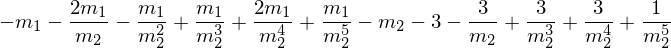

In [4]:
f.subs({r:m[2]**(-1)}).expand()


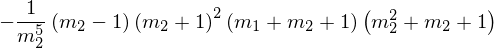

In [5]:
f.subs({r:m[2]**(-1)}).factor()

La única solución con $m_1>0$ y $m_2>0$ es $m_2=1$ y $m_1>0$ cualquier masa positiva. Este resultado es físicamente evidente.

<h2> Demostración que $r(m_1,m_2)$ es concava respecto a $m[2]$ para $m[1]$ fijo</h2>
Trataremos de ver que $\frac{\partial^2 r}{\partial m_2^2}<0$. Calculamos la derivada siguiendo la derivación de una función implícita. En la expresión de $f$ sustiuyo $r$ por una función de $m_1,m_2$ que llamo $R(m_1,m_2)$. A la expresión que resulta $f_1$ la derivo respecto a $m_2$ y despejo $\frac{\partial R}{\partial m_2}$ en función de $R$. 

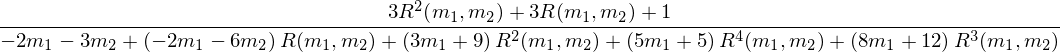

In [10]:
R=Function('R')(m[1],m[2])
f1=f.subs(r,R)
f1=f1.diff(m[2])
r_m2=solve(f1,R.diff(m[2]))[0].collect(R)
r_m2

A la expresión que resulta la derivo respecto a $m_2$, aparece nuevamente $\frac{\partial R}{\partial m_2}$ lo sustituyo por la expresión que había calculado antes  que lo ponía en función de $R$. Vuelvo a sustiruir $R$ por $r$ por simplicidad

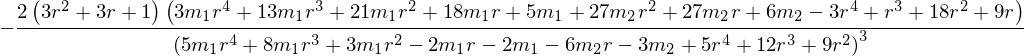

In [11]:
f2=r_m2.diff(m[2]).subs(R.diff(m[2]),r_m2).subs(R,r)
f2.simplify().factor()


Hay que demostrar que la expresión es negativa. Tomo los dos factores que no tienen un signo definido y los estudio por separado.

In [12]:
num=(3*m[1]*r**4 + 13*m[1]*r**3 + 21*m[1]*r**2 + 18*m[1]*r + 5*m[1] + 27*m[2]*r**2 + 27*m[2]*r + 6*m[2] - 3*r**4 + r**3 + 18*r**2 + 9*r)
dem=5*m[1]*r**4 + 8*m[1]*r**3 + 3*m[1]*r**2 - 2*m[1]*r - 2*m[1] - 6*m[2]*r - 3*m[2] + 5*r**4 + 12*r**3 + 9*r**2
dem.collect(r)


In [13]:
num.collect(r)

Creo que el teorema de Descartes implica que el cociente de estas expresiones cambian de signo. Ahora aquí nos hemos olvidado que $r=r(m_1,m_2)$, i.e. no se puede variar $r$ independientemente de $m_1,m_2$. La idea sería ver que si reemplazo $r$ por su expresión en $m_1,m_2$ quedan expresiones con signo definido. Claro que no tenemos una fórmula para $r$. Trato de usar la fórmula de Gastón
$$ r^3=\frac{m_2(3r^2+3r+1)+m_1(r+1)^2}{(r^2+3r+3)+m_1(r+1)^2}=:g$$
Reemplazo $r^3$ por $g$ y $r^4$ por $rg$


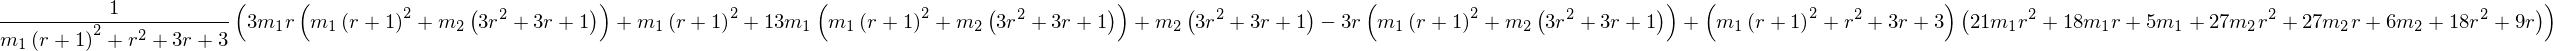

In [15]:
g=(m[2]*(3*r**2+3*r+1)+m[1]*(r+1)**2)/((r**2+3*r+3)+m[1]*(r+1)**2)
num.subs({r**4:g*r,r**3:g}).simplify()

Me quedo con el segundo factor, el primero se ve que es positivo

In [16]:
f3=(3*m[1]*r*(m[1]*(r + 1)**2 + m[2]*(3*r**2 + 3*r + 1)) + m[1]*(r + 1)**2 + 13*m[1]*(m[1]*(r + 1)**2 + m[2]*(3*r**2 + 3*r + 1)) + m[2]*(3*r**2 + 3*r + 1) - 3*r*(m[1]*(r + 1)**2 + m[2]*(3*r**2 + 3*r + 1)) + (m[1]*(r + 1)**2 + r**2 + 3*r + 3)*(21*m[1]*r**2 + 18*m[1]*r + 5*m[1] + 27*m[2]*r**2 + 27*m[2]*r + 6*m[2] + 18*r**2 + 9*r))
f3.expand(r).collect(r)

La expresión tiene sólo términos positivos. Hago lo mismo con "dem"

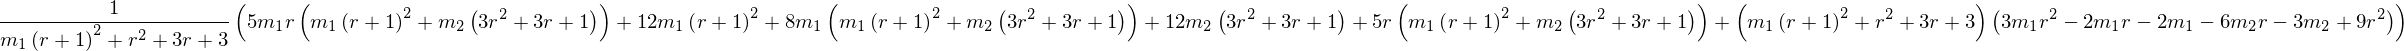

In [17]:
dem.subs({r**4:g*r,r**3:g}).simplify()

In [18]:
f4=(5*m[1]*r*(m[1]*(r + 1)**2 + m[2]*(3*r**2 + 3*r + 1)) + 12*m[1]*(r + 1)**2 + 8*m[1]*(m[1]*(r + 1)**2 + m[2]*(3*r**2 + 3*r + 1)) + 12*m[2]*(3*r**2 + 3*r + 1) + 5*r*(m[1]*(r + 1)**2 + m[2]*(3*r**2 + 3*r + 1)) + (m[1]*(r + 1)**2 + r**2 + 3*r + 3)*(3*m[1]*r**2 - 2*m[1]*r - 2*m[1] - 6*m[2]*r - 3*m[2] + 9*r**2))
f4.expand(r).collect(r)

También aparecen sólo términos positivos. Por consiguiente se llega a lo que quería.